<a href="https://colab.research.google.com/github/samkasse/CHM13/blob/master/Time_Series_Evaluation_Draft_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Time Series:- 

An aproach to predict stock data.

by: Atwine Mugume.

### Things to learn:-

- How to set up your own project.

- Working with time based data.



---



1. [Article](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-9-time-series-analysis-in-python-a270cb05e0b3)


2. [Article 2](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-9-part-3-predicting-the-future-with-facebook-prophet-3f3af145cdc)


3. [Python Quants](https://gist.github.com/yhilpisch/dfd1e9c87864d5e3d6b54f1943a9c1ec)

4. [You Tube Video Class](https://github.com/mGalarnyk/Python_Tutorials/tree/master/Time_Series)


5. [You Tube](https://www.youtube.com/watch?v=x4nO5yoarM0)

# Some notes learnt:-

1. There is a specifit method used to split time based data please use that when possible.

2. Please chackout this video, its quite informative: [Time Series Video](https://www.youtube.com/watch?v=VYpAodcdFfA) :: what we want to look at is how to decompose the data so that we can reduce noise and make it easy for prediction.

3. [Time Series Raj](https://www.youtube.com/watch?v=d4Sn6ny_5LI) :: this talks in brief about time series.

4. [Notebook Raj](https://github.com/llSourcell/Time_Series_Prediction/blob/master/Time%20Series.ipynb) :: this is the notebook of the video above.

In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

#remove warnings
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#read in the data downloaded
#use the variable parse_dates to make the dates easy to work with in your data
data = pd.read_csv('dt.csv', parse_dates=['Date'])

In [ ]:
#how much data points do I have?
data.shape

(12413, 7)

# Creating a test dataframe:

At this point I need to split the data in such a way that I keep some aside which the computer will not see at all in the process of training. 

I am going to take out 10 Years of data and see if our model can accurately predict the information that we already know.

In [ ]:
#let me create a column called Year, Quarter,

data['Year'] = data['Date'].apply(lambda x: x.year)
data["Quarter"] = data['Date'].apply(lambda x: x.quarter)

In [ ]:
data.head(4)

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Quarter
0,1971-02-05,100.000000,100.000000,100.000000,100.000000,100.000000,0,1971,1
1,1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0,1971,1
2,1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,0,1971,1
3,1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,0,1971,1


In [ ]:
#I want to categorize the Volume columns
data['Volume'] = abs(data["Volume"])
data['Bins'] = pd.cut((data['Volume']),3, labels=False)
data['Change'] = data['Close'] - data['Open']
#redundancy of data: 

#create a statistic based on aggregation
#statistics
data['%Change'] = (data['Change']/data['Open']) *100

#classify the aggregative statistic.
data["Direction"] = data['Change'].apply(lambda x: 1 if x >0 else 0)

In [ ]:
data.head(4)

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Quarter,Bins,Change,%Change,Direction,Mid,SMA1,SMA2,Ticks,SMAPosition
35,1971-03-29,105.199997,105.199997,105.199997,105.199997,105.199997,0,1971,1,0,0.0,0.0,0,105.199997,105.199165,102.926388,35,1
36,1971-03-30,105.440002,105.440002,105.440002,105.440002,105.440002,0,1971,1,0,0.0,0.0,0,105.440002,105.277499,103.077500,36,1
37,1971-03-31,105.970001,105.970001,105.970001,105.970001,105.970001,0,1971,1,0,0.0,0.0,0,105.970001,105.347499,103.220000,37,1
38,1971-04-01,106.339996,106.339996,106.339996,106.339996,106.339996,0,1971,2,0,0.0,0.0,0,106.339996,105.412499,103.375000,38,1


In [ ]:
#SMA - Simple Moving Average:
data['Mid'] = (data['Close'] + data['Open'])/2

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Quarter,Bins,Change,%Change,Direction,Mid
0,1971-02-05,100.000000,100.000000,100.000000,100.000000,100.000000,0,1971,1,0,0.0,0.0,0,100.000000
1,1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0,1971,1,0,0.0,0.0,0,100.839996
2,1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,0,1971,1,0,0.0,0.0,0,100.760002
3,1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,0,1971,1,0,0.0,0.0,0,100.690002
4,1971-02-11,101.449997,101.449997,101.449997,101.449997,101.449997,0,1971,1,0,0.0,0.0,0,101.449997


In [ ]:
#Rolling Mean

data['SMA1'] = data['Mid'].rolling(12).mean()
data['SMA2'] = data['Mid'].rolling(36).mean()

In [ ]:
data.head(4)

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Quarter,Bins,Change,%Change,Direction,Mid,SMA1,SMA2
0,1971-02-05,100.000000,100.000000,100.000000,100.000000,100.000000,0,1971,1,0,0.0,0.0,0,100.000000,NaN,NaN
1,1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0,1971,1,0,0.0,0.0,0,100.839996,NaN,NaN
2,1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,0,1971,1,0,0.0,0.0,0,100.760002,NaN,NaN
3,1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,0,1971,1,0,0.0,0.0,0,100.690002,NaN,NaN


In [ ]:
#this is an alias for the dates, so we can plot using this instead of using the dates to plot the data
data['Ticks'] = range(0, len(data.Date.index))

In [ ]:
data.head(4)

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Quarter,Bins,Change,%Change,Direction,Mid,SMA1,SMA2,Ticks
0,1971-02-05,100.000000,100.000000,100.000000,100.000000,100.000000,0,1971,1,0,0.0,0.0,0,100.000000,NaN,NaN,0
1,1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0,1971,1,0,0.0,0.0,0,100.839996,NaN,NaN,1
2,1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,0,1971,1,0,0.0,0.0,0,100.760002,NaN,NaN,2
3,1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,0,1971,1,0,0.0,0.0,0,100.690002,NaN,NaN,3


In [ ]:
#Let's take a look at the tail columns of the data
data.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Quarter,Bins,Change,%Change,Direction,Mid,SMA1,SMA2,Ticks
12408,2020-04-17,8667.480469,8670.299805,8531.690430,8650.139648,8650.139648,4335020000,2020,2,2,-17.340821,-0.200068,0,8658.810058,8030.097961,7893.377753,12408
12409,2020-04-20,8553.379883,8684.910156,8553.379883,8560.730469,8560.730469,3796950000,2020,2,2,7.350586,0.085938,1,8557.055176,8125.682556,7890.649970,12409
12410,2020-04-21,8460.690430,8480.290039,8215.690430,8263.230469,8263.230469,3756290000,2020,2,2,-197.459961,-2.333852,0,8361.960450,8205.647583,7889.077894,12410
12411,2020-04-22,8434.549805,8537.309570,8404.540039,8495.379883,8495.379883,3025060000,2020,2,1,60.830078,0.721201,1,8464.964844,8292.296733,7879.503174,12411
12412,2020-04-23,8528.839844,8635.230469,8475.200195,8494.750000,8494.750000,3734720000,2020,2,2,-34.089844,-0.399701,0,8511.794922,8352.720886,7870.814290,12412


In [ ]:
#I am going to drop add the NA values
data.dropna(inplace=True)

In [ ]:
#what is the size of the data?
data.shape

(12378, 17)

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Quarter,Bins,Change,%Change,Direction,Mid,SMA1,SMA2,Ticks
35,1971-03-29,105.199997,105.199997,105.199997,105.199997,105.199997,0,1971,1,0,0.0,0.0,0,105.199997,105.199165,102.926388,35
36,1971-03-30,105.440002,105.440002,105.440002,105.440002,105.440002,0,1971,1,0,0.0,0.0,0,105.440002,105.277499,103.077500,36
37,1971-03-31,105.970001,105.970001,105.970001,105.970001,105.970001,0,1971,1,0,0.0,0.0,0,105.970001,105.347499,103.220000,37
38,1971-04-01,106.339996,106.339996,106.339996,106.339996,106.339996,0,1971,2,0,0.0,0.0,0,106.339996,105.412499,103.375000,38
39,1971-04-02,106.860001,106.860001,106.860001,106.860001,106.860001,0,1971,2,0,0.0,0.0,0,106.860001,105.525832,103.546388,39


# Visualize the moving average

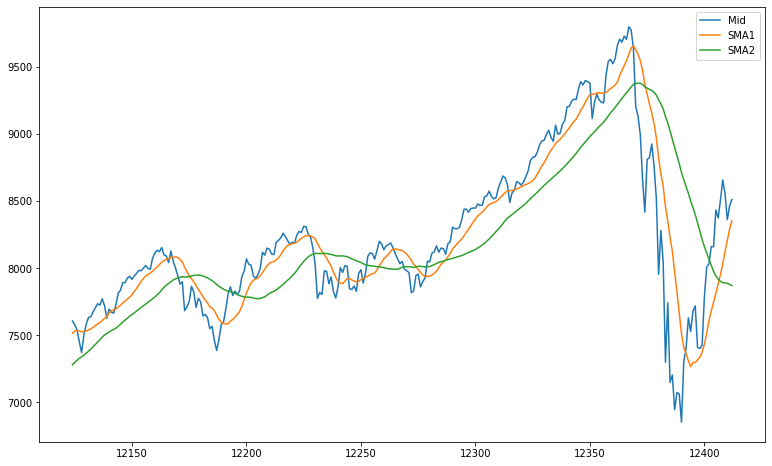

In [ ]:
#moving average visualisation from 2019 March
#Here I just want to see the movements of the stock with rolling mean and moving average.
dte = data[data['Date'] > '2019-03-01']
dte[['Mid', 'SMA1', 'SMA2']].plot(figsize=(13, 8));

In [ ]:
#SMA Positon
# long position = +1 | short position = -1
data['SMAPosition'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)

In [ ]:
data.head(4)

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Quarter,Bins,Change,%Change,Direction,Mid,SMA1,SMA2,Ticks,SMAPosition
35,1971-03-29,105.199997,105.199997,105.199997,105.199997,105.199997,0,1971,1,0,0.0,0.0,0,105.199997,105.199165,102.926388,35,1
36,1971-03-30,105.440002,105.440002,105.440002,105.440002,105.440002,0,1971,1,0,0.0,0.0,0,105.440002,105.277499,103.077500,36,1
37,1971-03-31,105.970001,105.970001,105.970001,105.970001,105.970001,0,1971,1,0,0.0,0.0,0,105.970001,105.347499,103.220000,37,1
38,1971-04-01,106.339996,106.339996,106.339996,106.339996,106.339996,0,1971,2,0,0.0,0.0,0,106.339996,105.412499,103.375000,38,1


In [ ]:
# https://gist.github.com/yhilpisch/dfd1e9c87864d5e3d6b54f1943a9c1ec

# Please have a look at that link it will help shed some light on this financial data.

#https://learn.datacamp.com/courses/time-series-analysis-in-python

#take the datacamp course on this matter to help you understand better.

In [ ]:
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Quarter,Bins,Change,%Change,Direction,Mid,SMA1,SMA2,Ticks,SMAPosition
35,1971-03-29,105.199997,105.199997,105.199997,105.199997,105.199997,0,1971,1,0,0.0,0.0,0,105.199997,105.199165,102.926388,35,1
36,1971-03-30,105.440002,105.440002,105.440002,105.440002,105.440002,0,1971,1,0,0.0,0.0,0,105.440002,105.277499,103.077500,36,1
37,1971-03-31,105.970001,105.970001,105.970001,105.970001,105.970001,0,1971,1,0,0.0,0.0,0,105.970001,105.347499,103.220000,37,1
38,1971-04-01,106.339996,106.339996,106.339996,106.339996,106.339996,0,1971,2,0,0.0,0.0,0,106.339996,105.412499,103.375000,38,1
39,1971-04-02,106.860001,106.860001,106.860001,106.860001,106.860001,0,1971,2,0,0.0,0.0,0,106.860001,105.525832,103.546388,39,1


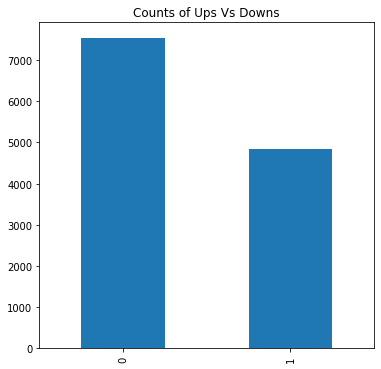

In [ ]:
#visualize how the data is moving oscilating over time
#we see that we have more up movements than down
#with this we can also use a classification algorithm to tell us if the stock is going up or down and by what percentage.
plt.figure(figsize= (6,6))
plt.title("Counts of Ups Vs Downs")
data.Direction.value_counts().plot(kind = 'bar')


Text(0.5, 1.0, 'Count of Records Per Year')

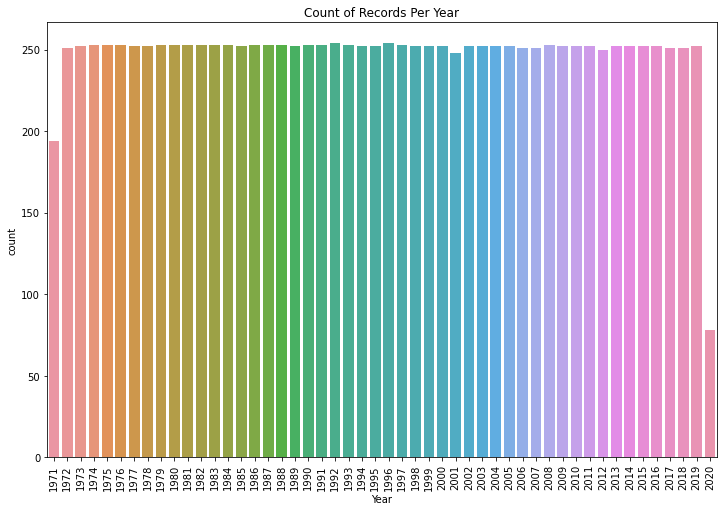

In [ ]:
#value counts in years
#here I want to make sure I have good data.
#so I count all the values based on the years that I downloaded.
plt.figure ( figsize = (12,8))
sns.countplot(
    x = 'Year',
    data = data

)
plt.xticks(rotation = 90)
plt.title("Count of Records Per Year")

In [ ]:
#value counts based on the bins
#I put the data in bins so that its easy to classify them.
data.Bins.value_counts()

0    9002
1    3315
2      61
Name: Bins, dtype: int64

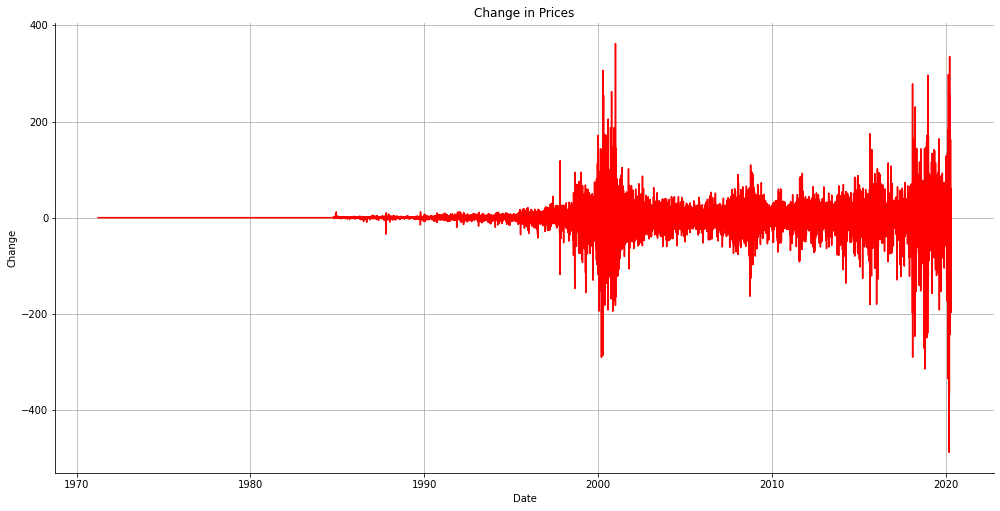

In [ ]:
#Choose a stat that is a better representation of what is really going on..in the market.
#this makes more sense to be the metric we look at.
sns.relplot(x = 'Date', y = 'Change', data=data, kind='line', height= 7, aspect= 2,color = 'red')
plt.title("Change in Prices")
plt.grid()
plt.show()

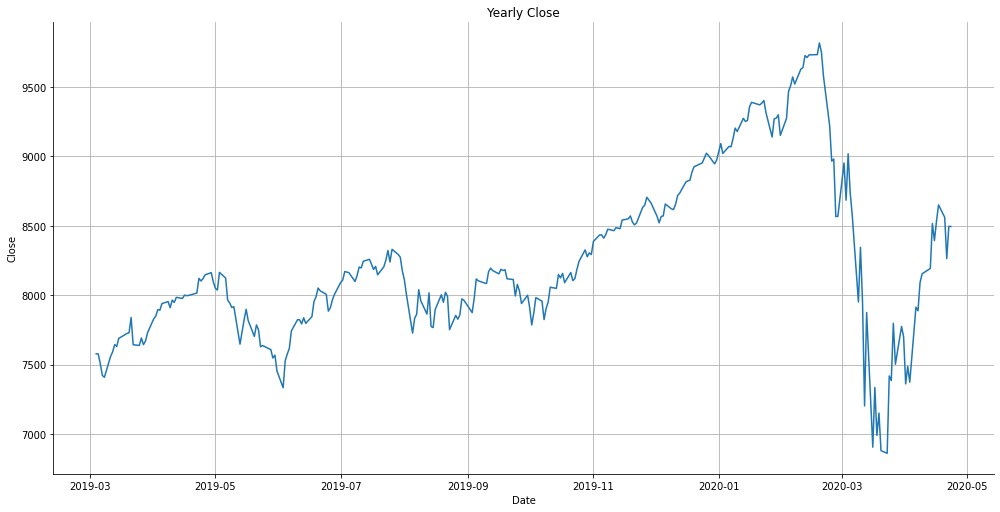

In [ ]:
#plot from 2019: sampled data, when I plot all the data it doesnt make much sense.
sns.relplot(x = 'Date', y = 'Close', data=dte, kind='line', height= 7, aspect= 2)
plt.title("Yearly Close")
plt.grid()
plt.show()

In [ ]:
# draw a categorical plot based on quaters for one year
 dt = data.query('Year == 2017')

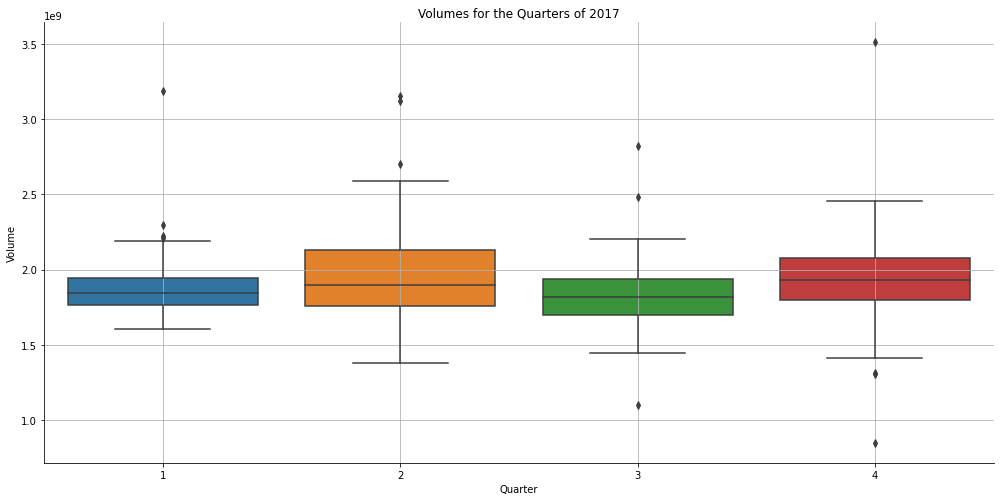

In [ ]:
sns.catplot(x = 'Quarter',
            y = 'Volume' ,
            kind = 'box',
            data = dt,
            height = 7,
            aspect = 2)
plt.title ("Volumes for the Quarters of 2017")
plt.grid()

In [ ]:
# Resampling

# Here I have to split the data in a way that I take some on which I can simulate a futuristic scenario.

# since 2020 has the least data I am going to train my algorithm to predict on that data

In [ ]:
data.dtypes

Date           datetime64[ns]
Open                  float64
High                  float64
Low                   float64
Close                 float64
Adj Close             float64
Volume                  int64
Year                    int64
Quarter                 int64
Bins                    int64
Change                float64
%Change               float64
Direction               int64
Mid                   float64
SMA1                  float64
SMA2                  float64
Ticks                   int64
SMAPosition             int64
dtype: object

# Splitting Data

In [ ]:
#create a mask
Test = data[data.Date.dt.year == 2020] #mask based on the year. I took out all the 2020 years
#the trick is that I already have the results of the price fluctuations so I can build a model and compare how its doing.

In [ ]:
Train = data.drop(index=data[data.Date.dt.year == 2020].index)

In [ ]:
#check whether you have the right years that are needed
Train.Year.unique()

array([1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019])

In [ ]:
Test.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Quarter,Bins,Change,%Change,Direction,Mid,SMA1,SMA2,Ticks,SMAPosition
12335,2020-01-02,9039.459961,9093.429688,9010.889648,9092.190430,9092.190430,2848370000,2020,1,1,52.730469,0.583336,1,9065.825196,8929.567098,8695.693197,12335,1
12336,2020-01-03,8976.429688,9065.759766,8976.429688,9020.769531,9020.769531,2567400000,2020,1,1,44.339843,0.493959,1,8998.599610,8945.886231,8710.994019,12336,1
12337,2020-01-06,8943.500000,9072.410156,8943.500000,9071.469727,9071.469727,2788120000,2020,1,1,127.969727,1.430869,1,9007.484863,8960.975383,8725.685818,12337,1
12338,2020-01-07,9076.639648,9091.929688,9042.549805,9068.580078,9068.580078,2352850000,2020,1,1,-8.059570,-0.088795,0,9072.609863,8981.093262,8742.464993,12338,1
12339,2020-01-08,9068.030273,9168.889648,9059.379883,9129.240234,9129.240234,2464090000,2020,1,1,61.209961,0.675008,1,9098.635254,9000.721639,8759.925985,12339,1


Text(0.5, 1.0, 'Count of Records Per Year')

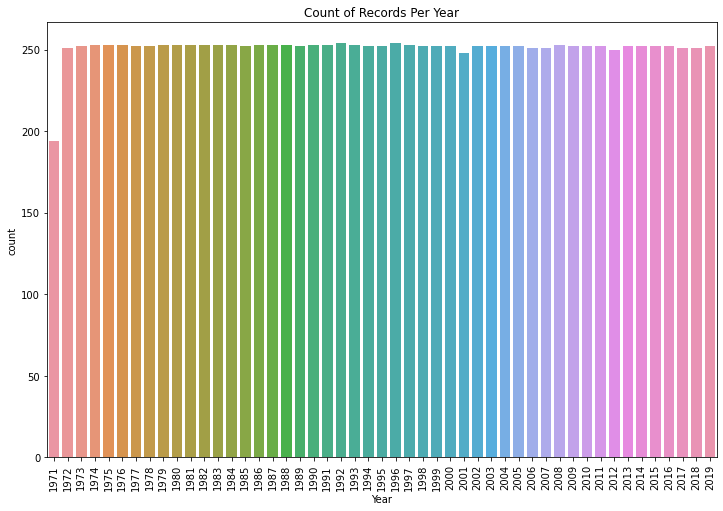

In [ ]:
#value counts in years
#make sure there is no 2020
plt.figure ( figsize = (12,8))
sns.countplot(
    x = 'Year',
    data = Train

)
plt.xticks(rotation = 90)
plt.title("Count of Records Per Year")

# Choosing my columns

In [ ]:
test = Test[['Date','Low','High','Adj Close','Volume','%Change']]
train = Train[['Date','Low','High','Adj Close','Volume','%Change']]

In [ ]:
#split the test dataset with X,y

test_values = test[['Low','High','Adj Close','Volume']]
test_label = test[['%Change']]

In [ ]:
from sklearn.model_selection import train_test_split

#let's take X and y out of the dataset
y = train['%Change']
x = train.drop(columns = ['%Change','Date'])

 #resample

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, shuffle = False)

In [ ]:
#importing some models.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#base models
model = LinearRegression()

In [ ]:
#fit the models
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
 prediction = model.predict(X_test)

In [ ]:
#the linear model score:
model.score(X_test,y_test)

0.4346263919279839

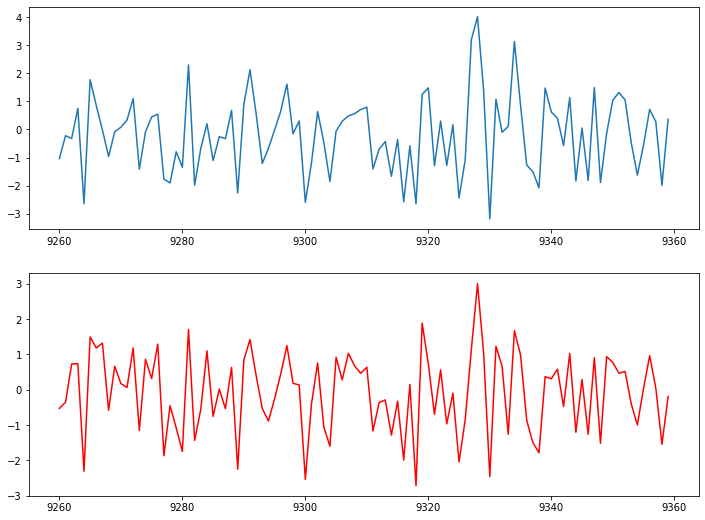

In [ ]:
#linear regressor visualization
fg, ax = plt.subplots(2,1)
ax[0].plot(X_test.index[:100], y_test[:100])
ax[1].plot(X_test.index[:100], prediction[:100], color = 'red')
fg.set_figheight(9)
fg.set_figwidth(12)

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
#initiate the model
xr = XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xr.fit(X_train,y_train)

[12:40:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
pred = xr.predict(X_test)

#the model is doing poorly on the train dataset.
print("Train score: ",xr.score(X_train,y_train))

#the model is doing extremely bad on the test dataset.
print("Test score: ",xr.score(X_test,y_test))




Train score:  0.023793865322833452
Test score:  -0.0354432870500776


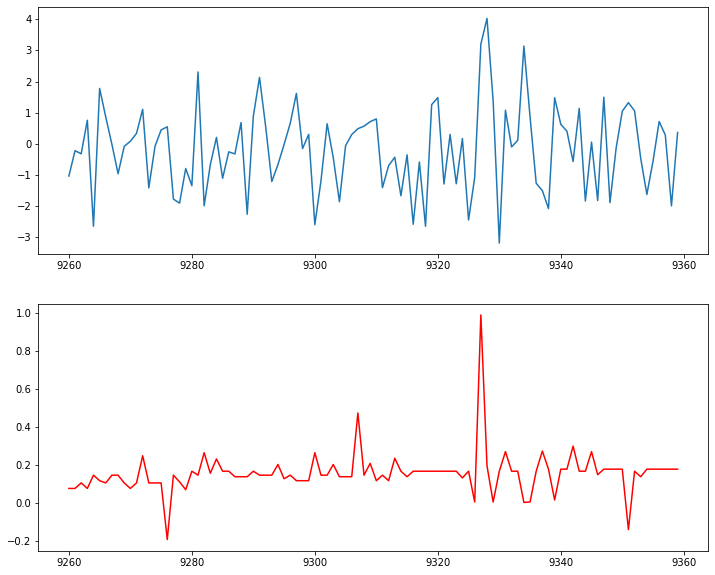

In [ ]:
#lets visualize just 100 points and their predictions
fg,ax = plt.subplots(2,1)
ax[0].plot(y_test.index[:100],y_test[:100])
ax[1].plot(y_test.index[:100],pred[:100], color = 'red')
fg.set_figheight(10)
fg.set_figwidth(12)

## as we can see the predictions are pretty bad maybe even for this model
## let us do some cross validation and improve this score.
## the R2 score tells us how correlated our model is with the data we tried to describe it with.

In [ ]:
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)

In [ ]:
#cross validation

params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=10,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)               

In [ ]:
#the results
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,1.036612,0.007811,1.035422,0.066853
1,1.017430,0.007704,1.016885,0.067882
2,1.001273,0.007599,1.001493,0.068690
3,0.988096,0.007673,0.988870,0.069411
4,0.977121,0.007593,0.978677,0.070026


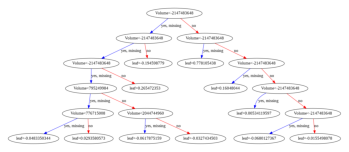

In [ ]:
## Draw the tree

import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
xgb.plot_tree(xr,num_trees=0)
plt.show()

<Figure size 576x864 with 0 Axes>

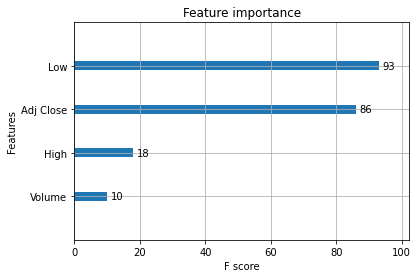

In [ ]:
#feature importance
plt.figure(figsize= (8,12))
xgb.plot_importance(xr)
plt.show()

# Model Spot Checking

In [ ]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.kernel_ridge import KernelRidge

('SVR', 0.6960251236077414, 0.6368429337825218)
('RF', 0.7072530341710946, 0.6403703284997976)
('Lasso', 0.6472600889015026, 0.5871905360213423)
('LGB', 0.6794221467841262, 0.6130104904305446)
('XGB', 0.7236787017693572, 0.6564701571143284)
('Kernel', 0.682686221555852, 0.6524293325368195)
('Linear', 0.4598551501388755, 0.40115761122352667)


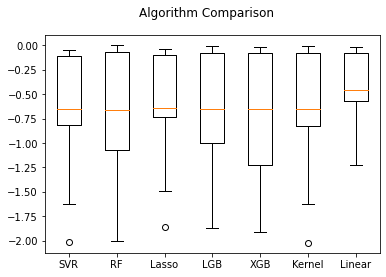

In [ ]:
# Compare Algorithms
from matplotlib import pyplot
# prepare models and add them to a list
models = []
models.append(("SVR", SVR()))
models.append(("RF", RandomForestRegressor()))
models.append(("Lasso", Lasso()))
models.append(("LGB",LGBMRegressor()))
models.append(("XGB", XGBRegressor(objective='reg:squarederror')))
models.append(("Kernel",KernelRidge()))
models.append(("Linear", LinearRegression()))

# evaluate each model in turn
results = []
names = []
scoring = 'neg_root_mean_squared_error'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = (name, -cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
from sklearn.metrics import SCORERS
list(
SCORERS.keys())

['explained_variance',
 'r2',
 'max_error',
 'neg_median_absolute_error',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_root_mean_squared_error',
 'neg_mean_poisson_deviance',
 'neg_mean_gamma_deviance',
 'accuracy',
 'roc_auc',
 'roc_auc_ovr',
 'roc_auc_ovo',
 'roc_auc_ovr_weighted',
 'roc_auc_ovo_weighted',
 'balanced_accuracy',
 'average_precision',
 'neg_log_loss',
 'neg_brier_score',
 'adjusted_rand_score',
 'homogeneity_score',
 'completeness_score',
 'v_measure_score',
 'mutual_info_score',
 'adjusted_mutual_info_score',
 'normalized_mutual_info_score',
 'fowlkes_mallows_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted']